# 偏微分方程的符号解和数值解

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

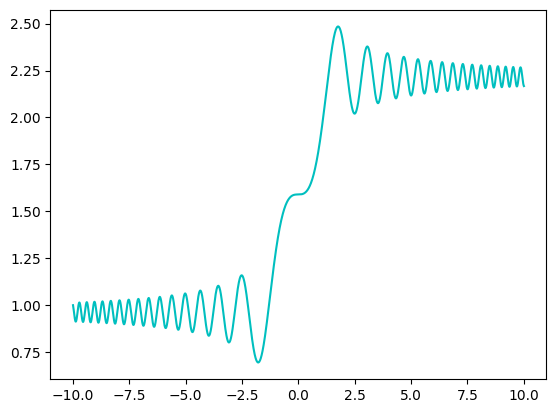

In [2]:
dt = 0.01
t0 = -10.0
y0 = 1
T = 10.0

t_list = [t0]
y_list = [y0]

t = t0
y = y0

while t < T:
    t += dt
    y = y + dt * (np.sin(t**2) + np.sin((t + dt) ** 2)) * 0.5
    t_list.append(t)
    y_list.append(y)

plt.plot(t_list, y_list, "c", label="T")
plt.show()

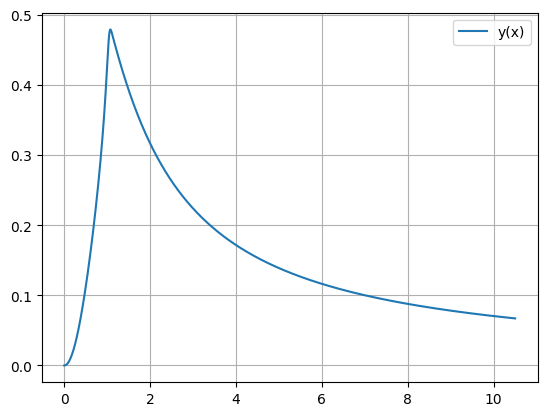

In [4]:
X = 10.5
x0 = 0
y0 = 0
dx = 0.001

x = x0
y = y0

x_list = [x0]
y_list = [y0]

while x < X:
    # 先求一个近似的 y_(n+1) 以便于后面的计算求出更精确的
    y_ = y + 1 / (x**2 + 1) - 2 * y**2
    x_ = x + dx
    y = 0.5 * (1 / (x_**2 + 1) - 2 * y_**2 + 1 / (x**2 + 1) - 2 * y**2) + y
    x = x_
    y_list.append(y)
    x_list.append(x)

plt.plot(x_list, y_list, label="y(x)")
plt.legend()
plt.grid("on")
plt.show()

x = [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4]
y = [[0.         0.09900996 0.19230775 0.2752294  0.34482762 0.40000004
  0.44117651 0.46979872 0.48780495 0.49723764 0.50000005 0.49773759
  0.49180331 0.48327139 0.47297298 0.46153847 0.44943821 0.437018
  0.42452831 0.41214752 0.40000002 0.38817007 0.37671235 0.3656598
  0.35502961 0.34482761 0.33505157 0.32569362 0.31674209 0.30818279
  0.30000001 0.2921772  0.28469751 0.27754416 0.27070064 0.26415095
  0.25787966 0.25187202 0.24611399 0.24059223 0.23529

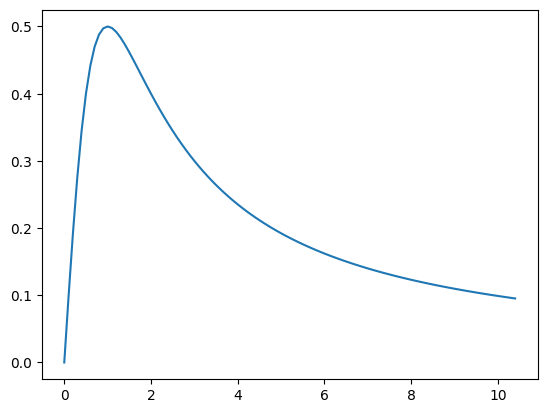

In [3]:
dy = lambda y, x: 1 / (1 + x**2) - 2 * y**2
# 从 0 开始，每次增加 0.1，加到 10.5 为止（取不到 10.5）
x = np.arange(0, 10.5, 0.1)
# 微分方程 dy，y 的首项（y(0) 等于多少），自变量列表
sol = odeint(dy, 0, x)
print("x = {}\ny = {}".format(x, sol.T))
plt.plot(x, sol)
plt.show()

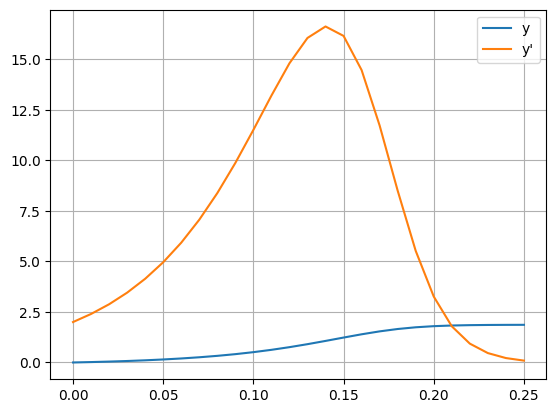

In [5]:
x0 = 0
X = 0.25
dx = 0.01
y0 = 0
yp0 = 2

x_list = [x0]
y_list = [y0]
yp_list = [yp0]

x = x0
y = y0
yp = yp0

while x < X:
    y_ = y + dx * (yp)
    yp_ = yp + dx * (20 * (1 - y**2) * yp - y)
    x += dx
    y = y_
    yp = yp_
    x_list.append(x)
    y_list.append(y)
    yp_list.append(yp)

plt.plot(x_list, y_list, label="y")
plt.plot(x_list, yp_list, label="y'")
plt.legend()
plt.grid("on")

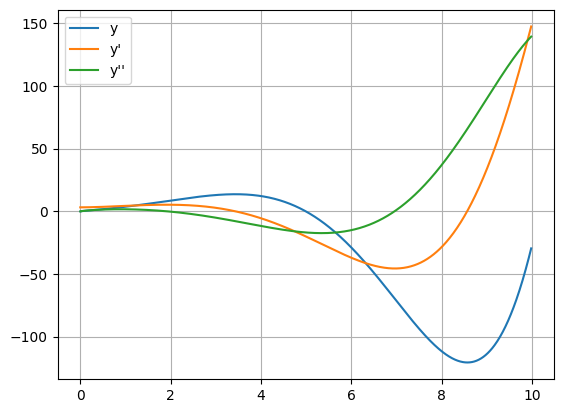

In [6]:
n = 1000
dx = 0.01

x = np.zeros(n)
y = np.zeros(n)
yp = np.zeros(n)
ypp = np.zeros(n)

x[0] = 0
y[0] = 0
yp[0] = np.pi
ypp[0] = 0

for i in range(n - 1):
    x[i + 1] = 10 * i / n
    y[i + 1] = y[i] + dx * yp[i]
    yp[i + 1] = yp[i] + dx * ypp[i]
    ypp[i + 1] = ypp[i] + dx * (np.cos(x[i]) - y[i] + yp[i] - ypp[i])

plt.plot(x, y, label="y")
plt.plot(x, yp, label="y'")
plt.plot(x, ypp, label="y''")
plt.legend()
plt.grid(True)
plt.show()

$$
\begin{cases}
\dfrac{\partial u(x,\ t)}{\partial t} = \dfrac{\partial^2u(x,\ t)}{\partial x^2} \quad 0 \le t \le 1000,\ 0 \le x \le 1 \\
u(x,\ 0) = 4x(3-x) \\
u(0,\ t) = 0 \\
u(3,\ t) = 0
\end{cases}
\\ 
\lambda = 1,\ l = 3,\ T = 1

In [ ]:
h = 0.1  # 空间步长
N = 30  # 空间步数
dt = 0.0001  # 时间步长
M = 10000  # 时间步数
A = dt / (h**2)  # lambda*tau/h^2
U = np.zeros([N + 1, M + 1])  # 建立二维空数组
Space = np.arange(0, (N + 1) * h, h)  # 建立空间等差数列，从 0 到 3，公差是 h

for k in np.arange(0, M + 1):
    U[0, k] = 0.0
    U[N, k] = 0.0

for i in np.arange(0, N + 1):
    U[i, 0] = 4 * i * h * (3 - i * h)

# 递推关系
for k in np.arange(0, M):
    for i in np.arange(1, N):
        U[i, k + 1] = A * U[i + 1, k] + (1 - 2 * A) * U[i, k] + A * U[i - 1, k]

plt.plot(Space, U[:, 0], "g-", label="t = 0", linewidth=1.0)
plt.plot(Space, U[:, 3000], "b-", label="t = 3 / 10", linewidth=1.0)
plt.plot(Space, U[:, 6000], "k-", label="t = 6 / 10", linewidth=1.0)
plt.plot(Space, U[:, 9000], "r-", label="t = 9 / 10", linewidth=1.0)
plt.plot(Space, U[:, 10000], "y-", label="t = 1", linewidth=1.0)
plt.ylabel("u(x, t)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xlim(0, 3)
plt.ylim(-2, 10)
plt.legend(loc="upper right")
plt.show()

In [ ]:
extent = [0, 1, 0, 3]
levels = np.arange(0, 10, 0.01)
plt.contourf(U, levels, extent=extent, cmap=plt.cm.jet, origin="lower")
plt.xlabel("t", fontsize=20)
plt.ylabel("x", fontsize=20)
plt.show()

In [ ]:
# 初始条件函数 U(x, 0)
def funcUx0(x, p):
    u0 = np.sin(2 * (x - p) ** 2)
    return u0

# 输入参数
v1 = 1.0  # 平流方程参数，系统速度
p = 0.25  # 初始条件函数 u(x, 0) 中的参数

tc = 0  # 开始时间
te = 1.0  # 终止时间：(0, te)
xa = 0.0  # 空间范围：(xa, xb)
xb = np.pi
dt = 0.02  # 时间差分步长
nNodes = 100  # 空间网格数

# 初始化
nsteps = round(te / dt)
dx = (xb - xa) / nNodes
x = np.arange(xa - dx, xb + 2 * dx, dx)
ux0 = funcUx0(x, p)

u = ux0.copy()  # u(j)
ujp = ux0.copy()  # u(j + 1)

# 时域差分
for i in range(nsteps):
    plt.clf()  # 清除当前 figure 的所有 axes，但是保留当前窗口

    # 计算 u(j + 1)
    for j in range(nNodes + 2):
        ujp[j] = u[j] - (v1 * dt / dx) * (u[j] - u[j - 1])

    # 更新边界条件
    u = ujp.copy()
    u[0] = u[nNodes + 1]
    u[nNodes + 2] = u[1]
    tc += dt

    plt.plot(x, u, "b-", label="v1 = 1.0")
    plt.axis((xa - 0.1, xb + 0.1, -1.1, 1.1))
    plt.xlabel("x")
    plt.ylabel("U(x)")
    plt.legend(loc=(0.05, 0.05))
    plt.title("Advection equation with finite difference method, t = %1.f" % (tc + dt))
    plt.text(0.05, 0.9, "ypucans-xupt", color="gainsboro")
    plt.pause(0.001)

plt.show()

In [1]:
from sympy.solvers.pde import pdsolve
from sympy import Function, pprint, exp
from sympy.abc import x, y

f = Function("f")
eq = -2 * f(x, y).diff(x) + 4 * f(x, y).diff(y) + 5 * f(x, y) - exp(x + 3 * y)
pdsolve(eq)

Eq(f(x, y), (F(4*x + 2*y)*exp(x/2) + exp(x + 4*y)/15)*exp(-y))